In [35]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [36]:
#Ajustar con options
pd.options.display.max_columns = 76
pd.options.display.max_rows = 76

In [37]:
Data_Berlin = pd.read_csv('Berlin_76_Final.csv')

In [38]:
# DF
DF_inicial = pd.read_csv('Berlin_76_Final.csv')
DF_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14187 entries, 0 to 14186
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    14187 non-null  int64  
 1   listing_url                                   14187 non-null  object 
 2   last_scraped                                  14187 non-null  object 
 3   source                                        14187 non-null  object 
 4   name                                          14187 non-null  object 
 5   description                                   14187 non-null  object 
 6   neighborhood_overview                         14187 non-null  object 
 7   picture_url                                   14187 non-null  object 
 8   host_id                                       14187 non-null  int64  
 9   host_url                                      14187 non-null 

In [39]:
#Eliminar Unnamed: 0
Berlin = DF_inicial.drop(['Unnamed: 0'],axis= 1)
Berlin

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/3176,2025-06-21,city scrape,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,prenzlauer berg,https://a0.muscache.com/pictures/airflow/Hosti...,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, Australia",We love to travel ourselves a lot and prefer t...,within a few hours,f,https://a0.muscache.com/im/users/3718/profile_...,https://a0.muscache.com/im/users/3718/profile_...,prenzlauer berg,"['email', 'phone']",t,t,"Berlin, Germany",prenzlauer berg südwest,Pankow,52.534710,13.418100,Entire rental unit,Entire home/apt,1 bath,"[""Iron"", ""Cleaning products"", ""Wifi"", ""Oven"", ...",t,2025-06-21,2009-06-20,2025-03-02,No License,f,100.000000,80.000000,1.0,1.0,2.0,1.0,1.0,2.0,105.000000,63.0,730.0,63.0,63.0,730.0,730.0,63.0,730.0,0,4,4,250,149.0,1.0,0.0,79,0.0,126,13230.0,4.63,4.67,4.52,4.65,4.70,4.92,4.61,1.0,1.0,0.0,0.0,0.76
1,https://www.airbnb.com/rooms/9991,2025-06-21,city scrape,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,prenzlauer berg,https://a0.muscache.com/pictures/42799131/59c8...,33852,https://www.airbnb.com/users/show/33852,Philipp,2009-08-25,"Berlin, Germany",Born in Munich - lives in and loves Berlin. Wo...,within a day,f,https://a0.muscache.com/im/users/33852/profile...,https://a0.muscache.com/im/users/33852/profile...,prenzlauer berg,"['email', 'phone']",t,t,"Berlin, Germany",prenzlauer berg südwest,Pankow,52.532690,13.418050,Entire rental unit,Entire home/apt,2.5 baths,"[""Iron"", ""Wifi"", ""Babysitter recommendations"",...",t,2025-06-21,2015-08-09,2020-01-04,03/Z/RA/003410-18,f,50.000000,87.618712,1.0,1.0,7.0,2.5,1.0,4.0,135.000000,6.0,14.0,6.0,6.0,14.0,14.0,6.0,14.0,0,0,5,193,7.0,0.0,0.0,29,0.0,0,0.0,5.00,5.00,5.00,5.00,5.00,4.86,4.86,1.0,1.0,0.0,0.0,0.06
2,https://www.airbnb.com/rooms/14325,2025-06-21,city scrape,Studio Apartment in Prenzlauer Berg,The apartment is located on the upper second f...,prenzlauer berg,https://a0.muscache.com/pictures/508703/24988a...,55531,https://www.airbnb.com/users/show/55531,Chris + Oliver,2009-11-18,"Berlin, Germany","From Berlin, Germany. We love to travel!",within a day,t,https://a0.muscache.com/im/users/55531/profile...,https://a0.muscache.com/im/users/55531/profile...,prenzlauer berg,"['email', 'phone', 'work_email']",t,t,prenzlauer berg nordwest,prenzlauer berg nordwest,Pankow,52.548130,13.403660,Entire rental unit,Entire home/apt,1 bath,"[""Hangers"", ""Wifi"", ""Coffee maker"", ""Host gree...",t,2025-06-21,2010-06-29,2023-11-30,No License,f,100.000000,25.000000,4.0,5.0,1.0,1.0,0.0,1.0,75

In [40]:
#Formato de host_id, latitude, longitude y host_is_superhost
Berlin['host_id'] = Berlin['host_id'].astype(str)
Berlin['latitude'] = Berlin['latitude'].astype(str)
Berlin['longitude'] = Berlin['longitude'].astype(str)
Berlin['host_is_superhost_num'] = Berlin['host_is_superhost'].map({'t':1,'f':0})

In [41]:
# Tipos de habitación
print(Berlin['room_type'].value_counts())

# Sub DF
Entire_home = Berlin[Berlin['room_type'] == 'Entire home/apt']
Private_room = Berlin[Berlin['room_type'] == 'Private room']
Hotel_room = Berlin[Berlin['room_type'] == 'Hotel room']
Shared_room = Berlin[Berlin['room_type'] == 'Shared room']

room_type
Entire home/apt    9580
Private room       4397
Hotel room          110
Shared room         100
Name: count, dtype: int64


In [42]:
#Seleccionar cuantitativas de cada Sub DF
Entire_home_cuant = Entire_home.select_dtypes(['int64','float64'])
Private_room_cuant = Private_room.select_dtypes(['int64','float64'])
Hotel_room_cuant = Hotel_room.select_dtypes(['int64','float64'])
Shared_room_cuant = Shared_room.select_dtypes(['int64','float64'])

**Punto 4**

In [43]:
#Correlación Entire home
Corr_Entire_home = Entire_home_cuant.corr()
Corr_Entire_home

#Absoluto
Corr_Entire_home1= abs(Corr_Entire_home)
Corr_Entire_home1

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost_num
host_response_rate,1.000000,0.356229,0.123852,0.119938,0.115571,0.020978,0.030547,0.123428,0.027310,0.251465,0.131091,0.254874,0.202956,0.040458,0.009493,0.252761,0.019842,0.034486,0.064443,0.085248,0.119681,0.216138,0.276194,0.255374,0.122104,0.251108,0.310141,0.280577,0.162040,0.162013,0.167924,0.163906,0.165251,0.161399,0.162691,0.108315,0.115508,0.044229,0.019768,0.290923,0.292549
host_acceptance_rate,0.356229,1.000000,0.076123,0.069121,0.064309,0.021816,0.023901,0.055904,0.068265,0.029447,0.083200,0.029653,0.055441,0.184687,0.204673,0.029310,0.193291,0.043487,0.052634,0.063048,0.068195,0.182425,0.229689,0.179116,0.084564,0.210234,0.201942,0.199127,0.002386,0.006664,0.012969,0.007844,0.005543,0.008386,0.002815,0.023583,0.077961,0.002270,0.044982,0.235435,0.172108
host_listings_count,0.123852,0.076123,1.000000,0.996542,0.038397,0.035262,0.023727,0.051790,0.005579,0.204320,0.198494,0.213686,0.015471,0.134860,0.117306,0.223980,0.120178,0.051717,0.058700,0.061453,0.040228,0.110704,0.112201,0.108425,0.025975,0.103830,0.126794,0.097247,0.315938,0.314025,0.310829,0.315692,0.318374,0.311935,0.322578,0.208100,0.146738,0.014126,0.004529,0.131305,0.109991
host_total_listings_count,0.119938,0.069121,0.996542,1.000000,0.033816,0.034829,0.020906,0.045037,0.007285,0.198171,0.190579,0.207424,0.017238,0.126531,0.110269,0.217549,0.112588,0.041189,0.047175,0.049189,0.050844,0.110625,0.111677,0.107323,0.013065,0.104105,0.125293,0.095788,0.313894,0.311983,0.308763,0.313497,0.316111,0.309313,0.320624,0.223463,0.160468,0.012343,0.003140,0.129670,0.112701
accommodates,0.115571,0.064309,0.038397,0.033816,1.000000,0.320659,0.571951,0.682214,0.203331,0.223972,0.028054,0.225765,0.211606,0.003078,0.015896,0.228348,0.012302,0.026731,0.042865,0.065679,0.087844,0.133210,0.189615,0.151975,0.097762,0.174515,0.156722,0.265323,0.090558,0.090073,0.090187,0.093210,0.091965,0.090364,0.091176,0.050387,0.025854,0.023359,0.007797,0.190562,0.064715
bathrooms,0.020978,0.021816,0.035262,0.034829,0.320659,1.000000,0.378372,0.280200,0.242791,0.079680,0.041113,0.077728,0.076872,0.069494,0.058641,0.081226,0.059624,0.020967,0.027707,0.026629,0.033076,0.012149,0.017762,0.003882,0.031454,0.017996,0.003985,0.123356,0.025192,0.021748,0.023591,0.020638,0.022690,0.018167,0.023694,0.026241,0.024019,0.014865,0.003035,0.002142,0.045883
bedrooms,0.030547,0.023901,0.023727,0.020906,0.571951,0.378372,1.000000,0.504996,0.224168,0.075607,0.007246,0.075358,0.065551,0.014687,0.002959,0.075360,0.000993,0.033435,0.030569,0.023282,0.021708,0.015318,0.020851,0.020942,0.016791,0.013280,0.009193,0.153431,0.019184,0.016396,0.016959,0.017996,0.019579,0.016863,0.021592,0.014023,0.043527,0.030250,0.013225,0.029355,0.014462
beds,0.123428,0.055904,0.051790,0.045037,0.682214,0.280200,0.504996,1.000000,0.182290,0.206978,0.035328,0.210199,0.188384,0.003212,0.003685,0.211760,0.002899,0.040980,0.059100,0.084529,0.122902,0.157692,0.197113,0.159831,0.126539,0.185289,0.177572,0.276033,0.110589,0.109876,0.111563,0.115131,0.113616,0.109244,0.112183,0.051972,0.033784,0.023259,0.008777,0.204785,0.095545
price,0.027310,0.068265,0.005579,0.007285,0.

In [44]:
#Correlación Private_room
Corr_Private_room = Private_room_cuant.corr()
Corr_Private_room

#Absoluto
Corr_Private_room1 = abs(Corr_Private_room)
Corr_Private_room1

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost_num
host_response_rate,1.000000,0.294110,0.025363,0.026196,0.065094,0.005959,0.037249,0.080998,0.014082,0.318601,0.191447,0.310510,0.307617,0.132831,0.094500,0.315336,0.112676,0.101333,0.134697,0.149989,0.162361,0.204530,0.282524,0.282217,0.170499,0.246208,0.327309,0.289253,0.097162,0.095847,0.112579,0.102971,0.098460,0.099189,0.097646,0.045556,0.039611,0.171238,0.022361,0.280493,0.309349
host_acceptance_rate,0.294110,1.000000,0.437281,0.438141,0.110840,0.014544,0.001323,0.088957,0.155634,0.050638,0.148519,0.048476,0.048242,0.203252,0.261138,0.049210,0.238807,0.094729,0.089749,0.102372,0.113786,0.130678,0.147952,0.117565,0.116637,0.123353,0.111437,0.134762,0.095191,0.101270,0.101052,0.107322,0.100226,0.101486,0.100184,0.409305,0.400755,0.200158,0.014521,0.141184,0.080641
host_listings_count,0.025363,0.437281,1.000000,0.999107,0.017292,0.017462,0.025199,0.024151,0.067786,0.060374,0.092133,0.059615,0.059775,0.122164,0.123620,0.060742,0.125711,0.283678,0.266848,0.264155,0.264004,0.082100,0.070133,0.068491,0.287103,0.069373,0.093479,0.072475,0.283028,0.283711,0.280138,0.283510,0.283279,0.278863,0.282496,0.988960,0.898092,0.014812,0.002413,0.085667,0.088408
host_total_listings_count,0.026196,0.438141,0.999107,1.000000,0.018382,0.014798,0.027288,0.023876,0.070583,0.061547,0.094096,0.060761,0.060839,0.121870,0.124489,0.061843,0.126070,0.286155,0.268810,0.265979,0.265612,0.080990,0.068402,0.067592,0.288959,0.067282,0.091841,0.071824,0.281959,0.282650,0.279245,0.282397,0.282132,0.277486,0.281422,0.987713,0.898417,0.015326,0.005294,0.084211,0.088740
accommodates,0.065094,0.110840,0.017292,0.018382,1.000000,0.027592,0.207074,0.631170,0.270839,0.127550,0.002292,0.127504,0.129176,0.020399,0.002765,0.129042,0.010126,0.054990,0.054000,0.050118,0.044394,0.057771,0.056397,0.035682,0.049176,0.038315,0.038469,0.133190,0.046903,0.048111,0.045276,0.055320,0.050602,0.051840,0.050684,0.047843,0.010094,0.200300,0.015050,0.066657,0.001932
bathrooms,0.005959,0.014544,0.017462,0.014798,0.027592,1.000000,0.074477,0.049279,0.020702,0.028426,0.009320,0.028578,0.026667,0.019987,0.014731,0.028107,0.015471,0.024860,0.025431,0.024194,0.019866,0.021653,0.016162,0.004064,0.000880,0.038458,0.022486,0.029864,0.000735,0.000384,0.006527,0.001736,0.001910,0.001360,0.002113,0.017666,0.018835,0.035421,0.027386,0.016531,0.008467
bedrooms,0.037249,0.001323,0.025199,0.027288,0.207074,0.074477,1.000000,0.190547,0.059075,0.096688,0.052823,0.097862,0.090946,0.032618,0.024423,0.095866,0.029269,0.072463,0.081042,0.085171,0.067908,0.035820,0.040705,0.044540,0.078750,0.022487,0.060789,0.032952,0.002306,0.001749,0.004508,0.000991,0.000366,0.003784,0.001173,0.029999,0.022425,0.044308,0.035131,0.045341,0.034124
beds,0.080998,0.088957,0.024151,0.023876,0.631170,0.049279,0.190547,1.000000,0.204011,0.124153,0.034089,0.124611,0.122610,0.057270,0.048603,0.125427,0.048419,0.104165,0.102404,0.102696,0.107658,0.078183,0.065371,0.033434,0.102237,0.043434,0.064038,0.137654,0.015985,0.015528,0.019553,0.024973,0.020051,0.018155,0.018337,0.014831,0.030471,0.242733,0.015744,0.058915,0.004038
price,0.014082,0.155634,0.067786,0.070583,0.

In [45]:
#Correlación Hotel_room
Corr_Hotel_room = Hotel_room_cuant.corr()
Corr_Hotel_room

#Absoluto
Corr_Hotel_room1 = abs(Corr_Hotel_room)
Corr_Hotel_room1

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost_num
host_response_rate,1.000000,0.193228,0.113326,0.136561,0.057100,0.012321,0.015566,0.014524,0.512549,0.028269,0.104107,0.109410,0.033696,0.088002,0.006632,0.040467,0.009532,0.105533,0.165432,0.127902,0.009039,0.167319,0.043942,0.053613,0.046168,0.089463,0.043757,0.075184,0.029626,0.043475,0.059373,0.020465,0.020682,0.057906,0.054627,0.199620,0.090716,0.008508,NaN,0.082186,0.145581
host_acceptance_rate,0.193228,1.000000,0.348982,0.292730,0.211327,0.316647,0.417623,0.221578,0.020951,0.055878,0.200571,0.181862,0.046246,0.371865,0.100289,0.079013,0.183730,0.107494,0.089810,0.105681,0.290634,0.271358,0.289415,0.232534,0.037162,0.284695,0.396825,0.323617,0.545400,0.547522,0.524580,0.554224,0.532195,0.535807,0.533775,0.042326,0.040856,0.264675,NaN,0.290727,0.504677
host_listings_count,0.113326,0.348982,1.000000,0.965513,0.232308,0.121722,0.201801,0.246588,0.006215,0.051787,0.347580,0.032280,0.064795,0.259629,0.320806,0.076504,0.282746,0.186163,0.175311,0.179832,0.269120,0.016116,0.097151,0.014365,0.124768,0.151641,0.096139,0.029681,0.050942,0.095809,0.021629,0.077204,0.034835,0.051174,0.052174,0.845488,0.610324,0.679778,NaN,0.034047,0.002259
host_total_listings_count,0.136561,0.292730,0.965513,1.000000,0.231338,0.112533,0.178651,0.235278,0.034301,0.069356,0.380716,0.037790,0.083976,0.335304,0.377609,0.089678,0.378964,0.193309,0.184039,0.195415,0.285715,0.004267,0.082351,0.030207,0.145911,0.129910,0.074883,0.021001,0.043184,0.086668,0.018454,0.073831,0.037980,0.044803,0.044508,0.833877,0.636137,0.626823,NaN,0.019906,0.074344
accommodates,0.057100,0.211327,0.232308,0.231338,1.000000,0.301939,0.582930,0.666466,0.240612,0.133037,0.096723,0.099810,0.139711,0.169908,0.267369,0.126859,0.209064,0.190522,0.174013,0.134597,0.122638,0.060752,0.107943,0.144349,0.063545,0.067344,0.117485,0.199603,0.251233,0.288270,0.258373,0.258036,0.218025,0.268545,0.256446,0.063291,0.053884,0.216252,NaN,0.008894,0.013576
bathrooms,0.012321,0.316647,0.121722,0.112533,0.301939,1.000000,0.282509,0.269682,0.176458,0.046108,0.106834,0.032912,0.057819,0.030606,0.220699,0.044198,0.087598,0.185170,0.141243,0.163405,0.119021,0.053837,0.047459,0.024149,0.105854,0.083078,0.060397,0.135431,0.409614,0.417531,0.407481,0.413843,0.386148,0.413069,0.414975,0.099696,0.036682,0.067767,NaN,0.086886,0.093646
bedrooms,0.015566,0.417623,0.201801,0.178651,0.582930,0.282509,1.000000,0.586146,0.039353,0.093947,0.158574,0.064959,0.106663,0.099475,0.237274,0.087878,0.035940,0.276594,0.194894,0.177710,0.111450,0.045729,0.107371,0.032888,0.109351,0.088000,0.130982,0.042702,0.421251,0.436097,0.420983,0.474355,0.387595,0.437157,0.429272,0.099811,0.021446,0.193238,NaN,0.095439,0.140783
beds,0.014524,0.221578,0.246588,0.235278,0.666466,0.269682,0.586146,1.000000,0.090363,0.155465,0.001576,0.112671,0.149960,0.045303,0.204230,0.146728,0.098528,0.201032,0.154649,0.123179,0.037587,0.058302,0.116517,0.286005,0.048894,0.111784,0.194913,0.212112,0.223366,0.241750,0.218698,0.249892,0.202123,0.244913,0.216539,0.044271,0.057269,0.190492,NaN,0.074026,0.107161
price,0.512549,0.020951,0.006215,0.034301,0.240612,0.176458,0.039353,0.090363,1.0000

In [46]:
#Correlación Shared_room
Corr_Shared_room = Shared_room_cuant.corr()
Corr_Shared_room

#Absoluto
Corr_Shared_room1 = abs(Corr_Shared_room)
Corr_Shared_room1

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost_num
host_response_rate,1.000000,0.434360,0.178563,0.098611,0.288741,0.024147,0.155636,0.301466,0.273221,0.117962,0.060180,0.098912,0.111109,0.181062,0.212779,0.116326,0.025275,0.179496,0.278349,0.282028,0.117913,0.308047,0.304870,0.179316,0.094913,0.244154,0.342929,0.284959,0.327101,0.339143,0.334296,0.327972,0.317166,0.331782,0.330755,0.171389,0.659338,0.063822,0.357691,0.254939,0.243778
host_acceptance_rate,0.434360,1.000000,0.279154,0.186056,0.166632,0.253864,0.017841,0.139295,0.082523,0.329728,0.181779,0.246420,0.320651,0.397706,0.095728,0.327727,0.115090,0.160956,0.169491,0.083845,0.065351,0.186772,0.174327,0.159708,0.089741,0.120351,0.233857,0.162833,0.105754,0.118599,0.155978,0.101491,0.104071,0.117294,0.127937,0.317860,0.806610,0.335339,0.513280,0.202321,0.035962
host_listings_count,0.178563,0.279154,1.000000,0.795884,0.352696,0.136709,0.088477,0.394327,0.068961,0.291420,0.294964,0.275277,0.273877,0.392304,0.456662,0.292443,0.478031,0.449440,0.456795,0.370077,0.145786,0.285157,0.157174,0.002307,0.123278,0.147708,0.129687,0.160066,0.125289,0.115834,0.083115,0.126232,0.123992,0.145413,0.131825,0.996018,0.303144,0.943733,0.552204,0.015882,0.347507
host_total_listings_count,0.098611,0.186056,0.795884,1.000000,0.211624,0.024983,0.122832,0.308164,0.035600,0.072080,0.328593,0.132054,0.060032,0.236529,0.488599,0.074213,0.437133,0.331301,0.363719,0.328926,0.006292,0.181552,0.042609,0.105986,0.012367,0.059508,0.027654,0.024467,0.265173,0.258236,0.251687,0.270430,0.265018,0.290375,0.279611,0.774577,0.143004,0.718447,0.308639,0.172537,0.308119
accommodates,0.288741,0.166632,0.352696,0.211624,1.000000,0.130193,0.256071,0.499037,0.113649,0.281255,0.101918,0.267919,0.276151,0.313358,0.199574,0.280313,0.087473,0.187547,0.223656,0.226141,0.182617,0.449418,0.418568,0.160197,0.062366,0.337118,0.494951,0.351263,0.423892,0.428969,0.466645,0.425048,0.411757,0.397963,0.429633,0.351348,0.140826,0.191800,0.241579,0.277997,0.088284
bathrooms,0.024147,0.253864,0.136709,0.024983,0.130193,1.000000,0.222331,0.027533,0.005168,0.204815,0.001145,0.156576,0.214576,0.088764,0.007926,0.209339,0.200575,0.333140,0.286367,0.236149,0.464074,0.101899,0.137149,0.068696,0.224048,0.227035,0.075693,0.012338,0.051581,0.053864,0.064278,0.044445,0.034352,0.027808,0.049710,0.152264,0.226536,0.238917,0.099981,0.148338,0.258985
bedrooms,0.155636,0.017841,0.088477,0.122832,0.256071,0.222331,1.000000,0.015698,0.028002,0.062094,0.012097,0.057448,0.056701,0.034854,0.004685,0.059304,0.017301,0.135181,0.149230,0.128946,0.105000,0.089363,0.092983,0.127150,0.015268,0.118948,0.082934,0.033239,0.110633,0.107235,0.136211,0.109488,0.112393,0.086334,0.118811,0.083295,0.144453,0.166032,0.014959,0.214568,0.325139
beds,0.301466,0.139295,0.394327,0.308164,0.499037,0.027533,0.015698,1.000000,0.107202,0.164379,0.090945,0.145502,0.158421,0.166928,0.002030,0.163897,0.043682,0.275206,0.316235,0.324468,0.041834,0.373546,0.125041,0.142243,0.148344,0.199174,0.292907,0.057617,0.322651,0.318500,0.361553,0.313312,0.333156,0.296821,0.306515,0.395578,0.143116,0.257455,0.298841,0.105710,0.083531
price,0.273221,0.082523,0.068961,0.035600,0.

Gráficas de dispersión

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

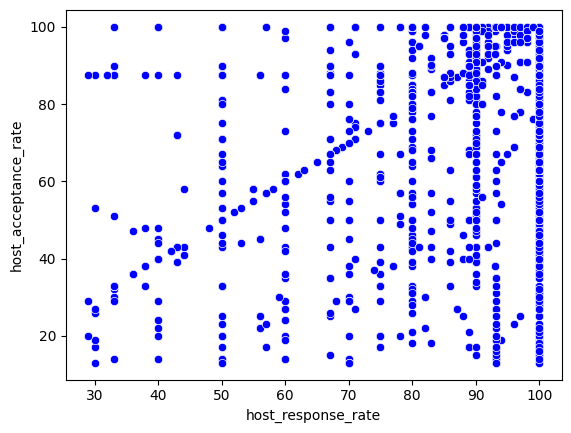

In [47]:
#Entire home/apt
sns.scatterplot(x= 'host_response_rate', y= 'host_acceptance_rate', color= 'blue', data= Entire_home_cuant)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

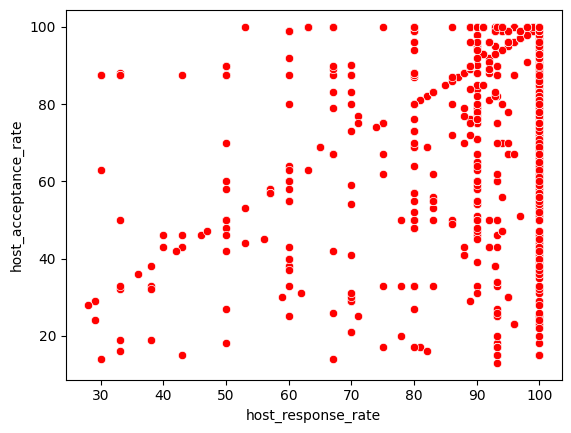

In [48]:
#Private_room
sns.scatterplot(x= 'host_response_rate', y= 'host_acceptance_rate', color= 'red', data= Private_room_cuant)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

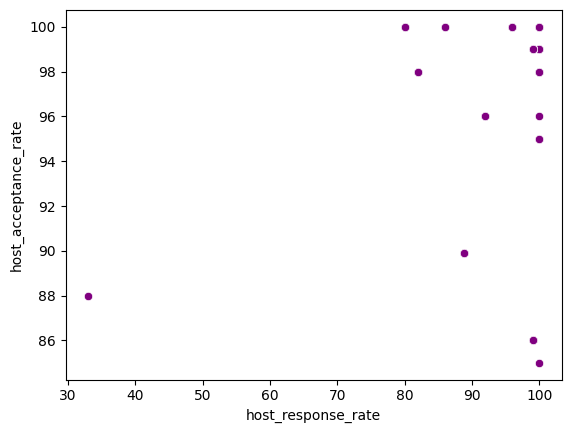

In [49]:
#Hotel room
sns.scatterplot(x= 'host_response_rate', y= 'host_acceptance_rate', color= 'purple', data= Hotel_room_cuant)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

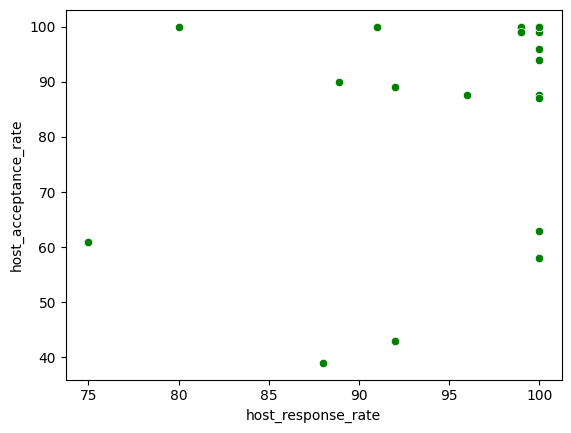

In [50]:
# Shared room
sns.scatterplot(x= 'host_response_rate', y= 'host_acceptance_rate', color= 'green', data= Shared_room_cuant)

**Punto 5**

In [51]:
# Entire home/apt
# Con ayuda de inteligencia artificial se obtuvo el siguiente código para identificar las correlaciones más altas
# Identificar las correlaciones con mayor correlación 
corr_matrix_entire = Corr_Entire_home1.copy()

np.fill_diagonal(corr_matrix_entire.values, np.nan)

corr_unstack_entire = corr_matrix_entire.unstack().dropna()

corr_unstack_entire = corr_unstack_entire.drop_duplicates()

top_corr_entire = corr_unstack_entire.sort_values(ascending= False).head(30)
top_corr_entire


host_listings_count             host_total_listings_count                      0.996542
review_scores_rating            review_scores_accuracy                         0.995612
                                review_scores_communication                    0.994813
                                review_scores_value                            0.994565
review_scores_checkin           review_scores_communication                    0.993950
review_scores_accuracy          review_scores_communication                    0.993736
review_scores_rating            review_scores_checkin                          0.993364
review_scores_accuracy          review_scores_checkin                          0.993008
                                review_scores_value                            0.992887
review_scores_rating            review_scores_cleanliness                      0.992799
review_scores_accuracy          review_scores_cleanliness                      0.991777
review_scores_communication     

In [52]:
# Private room
# Identificar las correlaciones con mayor correlación 
corr_matrix_private = Corr_Private_room1.copy()

np.fill_diagonal(corr_matrix_private.values, np.nan)

corr_unstack_private = Corr_Private_room1.unstack().dropna()

corr_unstack_private = corr_unstack_private.drop_duplicates()

top_corr_private = corr_unstack_private.sort_values(ascending= False).head(30)
top_corr_private

host_response_rate           host_response_rate                1.000000
host_listings_count          host_total_listings_count         0.999107
minimum_minimum_nights       minimum_nights_avg_ntm            0.994729
minimum_nights               minimum_nights_avg_ntm            0.994329
review_scores_checkin        review_scores_communication       0.993085
review_scores_rating         review_scores_accuracy            0.993082
review_scores_accuracy       review_scores_communication       0.991926
review_scores_rating         review_scores_communication       0.991325
review_scores_accuracy       review_scores_value               0.990922
review_scores_rating         review_scores_value               0.990714
maximum_minimum_nights       minimum_nights_avg_ntm            0.990655
review_scores_communication  review_scores_value               0.989720
minimum_nights               minimum_minimum_nights            0.989603
review_scores_accuracy       review_scores_checkin             0

In [53]:
# Hotel room
# Identificar las correlaciones con mayor correlación 
corr_matrix_hotel = Corr_Hotel_room1.copy()

np.fill_diagonal(corr_matrix_hotel.values, np.nan)

corr_unstack_hotel = corr_matrix_hotel.unstack().dropna()

corr_unstack_hotel = corr_unstack_hotel.drop_duplicates()

top_corr_hotel = corr_unstack_hotel.sort_values(ascending= False).head(30)
top_corr_hotel

minimum_nights               maximum_minimum_nights         0.996268
maximum_minimum_nights       minimum_nights_avg_ntm         0.993454
minimum_nights               minimum_nights_avg_ntm         0.993384
review_scores_rating         review_scores_cleanliness      0.990382
review_scores_accuracy       review_scores_value            0.987577
review_scores_rating         review_scores_value            0.987335
                             review_scores_accuracy         0.982954
review_scores_cleanliness    review_scores_value            0.982275
review_scores_accuracy       review_scores_location         0.982244
review_scores_location       review_scores_value            0.981428
review_scores_accuracy       review_scores_checkin          0.981329
availability_60              availability_90                0.978700
review_scores_checkin        review_scores_value            0.976128
                             review_scores_location         0.974680
review_scores_rating         revie

In [54]:
# Shared room
# Identificar las correlaciones con mayor correlación 
corr_matrix_shared = Corr_Shared_room1.copy()

np.fill_diagonal(corr_matrix_shared.values, np.nan)

corr_unstack_shared = corr_matrix_shared.unstack().dropna()

corr_unstack_shared = corr_unstack_shared.drop_duplicates()

top_corr_shared= corr_unstack_shared.sort_values(ascending= False).head(30)
top_corr_shared

minimum_nights                  minimum_nights_avg_ntm                          0.999956
maximum_minimum_nights          minimum_nights_avg_ntm                          0.999603
minimum_nights                  maximum_minimum_nights                          0.999453
host_listings_count             calculated_host_listings_count                  0.996018
review_scores_accuracy          review_scores_checkin                           0.995308
review_scores_rating            review_scores_accuracy                          0.994795
review_scores_checkin           review_scores_location                          0.994243
review_scores_accuracy          review_scores_value                             0.993384
review_scores_rating            review_scores_communication                     0.993249
review_scores_checkin           review_scores_value                             0.991293
review_scores_rating            review_scores_checkin                           0.991190
review_scores_accurac

**Punto 6 (Modelos de regresión múltiple)**

In [55]:
# Variables cuantitativas de Berlin y obtener su correlación
Berlin_cuant = Berlin.select_dtypes(['int64','float64'])
Berlin_corr = Berlin_cuant.corr()
Berlin_corr


,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost_num
host_response_rate,1.000000,0.339578,-0.084186,-0.080148,0.112577,0.014980,0.026643,0.122026,0.023193,-0.271874,-0.149060,-0.272246,-0.234988,-0.070802,-0.034255,-0.271758,-0.048368,0.060163,0.091804,0.110838,0.137775,0.212647,0.278294,0.262167,0.142788,0.250125,0.315556,0.273274,0.142961,0.142637,0.151628,0.145929,0.145625,0.143113,0.142979,0.087016,0.105067,0.071319,0.000326,0.287392,0.297236
host_acceptance_rate,0.339578,1.000000,-0.054875,-0.064361,0.087715,-0.020094,-0.007619,0.075098,0.095858,-0.010704,0.101183,-0.011635,-0.029771,0.183056,0.217152,-0.010998,0.201304,0.006273,0.013906,0.016840,0.022688,0.170200,0.206673,0.160895,0.031120,0.185410,0.178461,0.186516,0.032657,0.037654,0.042346,0.040171,0.036138,0.038989,0.034430,-0.137396,0.031989,0.077098,-0.022923,0.208719,0.147663
host_listings_count,-0.084186,-0.054875,1.000000,0.996923,0.000632,-0.026034,-0.008208,-0.023027,0.003843,0.134396,0.109663,0.141520,-0.027988,0.062675,0.053485,0.149187,0.055485,0.038026,0.030559,0.029001,0.104598,-0.099205,-0.096612,-0.094087,0.061546,-0.090912,-0.111379,-0.076091,-0.305447,-0.304101,-0.300663,-0.305370,-0.307242,-0.301347,-0.310397,0.444451,0.210400,-0.030248,-0.009285,-0.114915,-0.101279
host_total_listings_count,-0.080148,-0.064361,0.996923,1.000000,0.004504,-0.024556,-0.006016,-0.017418,0.001976,0.128088,0.101570,0.135026,-0.029830,0.054981,0.046309,0.142577,0.048009,0.048491,0.041566,0.040567,0.114275,-0.098889,-0.095731,-0.093018,0.073526,-0.090546,-0.109934,-0.074484,-0.304083,-0.302761,-0.299378,-0.303898,-0.305681,-0.299485,-0.309099,0.461284,0.223158,-0.030856,-0.001150,-0.113348,-0.103374
accommodates,0.112577,0.087715,0.000632,0.004504,1.000000,0.264063,0.559806,0.704707,0.288068,-0.189371,-0.041780,-0.191448,-0.186684,-0.017855,0.002982,-0.191333,-0.001937,0.033779,0.049411,0.070357,0.123448,0.128345,0.170865,0.128767,0.115367,0.153233,0.151767,0.302208,0.067414,0.067336,0.069014,0.069961,0.068645,0.068485,0.065303,0.053226,0.102046,-0.089870,-0.022803,0.169680,0.059736
bathrooms,0.014980,-0.020094,-0.026034,-0.024556,0.264063,1.000000,0.326673,0.235728,0.197652,-0.044623,-0.027922,-0.043648,-0.044365,-0.039424,-0.036274,-0.045507,-0.034944,-0.001601,0.004321,0.005822,0.031717,0.012353,0.017430,0.003537,0.022160,0.022662,-0.006858,0.105546,0.014193,0.011792,0.011887,0.010289,0.012955,0.009636,0.011973,-0.024670,-0.004662,-0.038382,-0.016748,0.000644,0.034386
bedrooms,0.026643,-0.007619,-0.008208,-0.006016,0.559806,0.326673,1.000000,0.495652,0.252244,-0.045644,0.002009,-0.045787,-0.042166,-0.009404,0.002950,-0.044771,0.000743,-0.039817,-0.036108,-0.027514,0.002738,0.012533,0.020460,0.015731,-0.006565,0.015701,-0.002412,0.174629,0.008197,0.006035,0.007278,0.006564,0.008569,0.006350,0.008248,-0.013123,0.007509,-0.101820,-0.018454,0.026144,-0.007192
beds,0.122026,0.075098,-0.023027,-0.017418,0.704707,0.235728,0.495652,1.000000,0.239296,-0.182526,-0.052233,-0.185459,-0.172873,-0.026534,-0.015508,-0.185227,-0.017640,0.057887,0.074343,0.096671,0.151365,0.151268,0.175307,0.136936,0.142508,0.161475,0.168496,0.296944,0.080732,0.080226,0.083790,0.084989,0.0836

In [56]:
# y = review_scores_rating
# x = number_of_reviews_ltm (0.32), estimated_occupancy_l365d (0.43), y  reviews_per_month (0.38).

#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep_r_s_r= Berlin_cuant[['number_of_reviews_ltm', 'estimated_occupancy_l365d','reviews_per_month']]
Var_Dep_r_s_r= Berlin_cuant['review_scores_rating']

# Define modelo
model_r_s_r = LinearRegression()

# Ajustar modelo
model_r_s_r.fit(X= Vars_Indep_r_s_r, y= Var_Dep_r_s_r)

#Verificamos los coeficientes obtenidos para el modelo ajustado
print(model_r_s_r.__dict__)

#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print(model_r_s_r.score(Vars_Indep_r_s_r,Var_Dep_r_s_r))

#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter_r_s_r =model_r_s_r.score(X=Vars_Indep_r_s_r, y=Var_Dep_r_s_r)
print('R^2: ',coef_Deter_r_s_r)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl_r_s_r = np.sqrt(coef_Deter_r_s_r)
print('R: ',coef_Correl_r_s_r) 

{'fit_intercept': True, 'copy_X': True, 'tol': 1e-06, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['number_of_reviews_ltm', 'estimated_occupancy_l365d',
       'reviews_per_month'], dtype=object), 'n_features_in_': 3, 'coef_': array([-0.03159105,  0.00882625,  0.36112878]), 'rank_': 3, 'singular_': array([12172.76343057,   984.91453074,    85.13495531]), 'intercept_': np.float64(2.893333786252321)}
0.20129441421874528
R^2:  0.20129441421874528
R:  0.4486584605451515


In [ ]:
# y = host_acceptance_rate
# x = host_response_rate (0.34), reviews_per_month (0.21), y estimated_revenue_l365d (0.19)

Vars_Indep_h_a_r = Berlin_cuant[['host_response_rate','reviews_per_month','estimated_revenue_l365d']]
Var_Dep_h_a_r = Berlin_cuant['host_acceptance_rate']

model_h_a_r = LinearRegression()
model_h_a_r.fit(X=Vars_Indep_h_a_r, y=Var_Dep_h_a_r)

coef_Deter_h_a_r = model_h_a_r.score(Vars_Indep_h_a_r, Var_Dep_h_a_r)
coef_Correl_h_a_r = np.sqrt(coef_Deter_h_a_r)

print("R^2: ", coef_Deter_h_a_r)
print("R: ", coef_Correl_h_a_r)


R^2:  0.1299982773530559
R:  0.3605527386569903


In [ ]:
# host_is_superhost_num
# y = host_is_superhost_num
# x = 'estimated_occupancy_l365d' (0.50),'estimated_revenue_l365d (0.42)', 'minimum_nights (-0.33)'

Vars_Indep_h_i_s = Berlin_cuant[['estimated_occupancy_l365d','estimated_revenue_l365d', 'minimum_nights']]
Var_Dep_h_i_s = Berlin_cuant['host_is_superhost_num']

model_h_i_s = LinearRegression()
model_h_i_s.fit(X= Vars_Indep_h_i_s, y= Var_Dep_h_i_s)

coef_Deter_h_i_s = model_h_i_s.score(Vars_Indep_h_i_s, Var_Dep_h_i_s)
coef_Correl_h_i_s = np.sqrt(coef_Deter_h_i_s)

print('R^2: ', coef_Deter_h_i_s)
print('R: ', coef_Correl_h_i_s)

R^2:  0.26979546516804975
R:  0.5194183912493374


In [61]:
# host_is_superhost fue sustituida por availability_30
# y = availability_30
# x = availability_eoy (0.77), calculated_host_listings_count (0.20) y maximum_nights (-0.20)
Vars_Indep_av30 = Berlin_cuant[['availability_eoy','calculated_host_listings_count','maximum_nights']]
Var_Dep_av30 = Berlin_cuant['availability_30']

model_av30 = LinearRegression()
model_av30.fit(X=Vars_Indep_av30, y=Var_Dep_av30)

# Coeficiente de determinación (R²)
coef_Deter_av30 = model_av30.score(Vars_Indep_av30, Var_Dep_av30)

# Coeficiente de correlación múltiple (R)
coef_Correl_av30 = np.sqrt(coef_Deter_av30)

print("R^2: ", coef_Deter_av30)
print("R: ", coef_Correl_av30)

R^2:  0.6071498341526993
R:  0.7791981995312228


In [62]:
# y = host_total_listings_count
# x = calculated_host_listings_count (0.46), minimum_nights_avg_ntm (0.14), y review_scores_communication (-0.31)
Vars_Indep_h_t_l_c = Berlin_cuant[['calculated_host_listings_count','minimum_nights_avg_ntm','review_scores_communication']]
Var_Dep_h_t_l_c = Berlin_cuant['host_total_listings_count']

model_h_t_l_c = LinearRegression()
model_h_t_l_c.fit(X=Vars_Indep_h_t_l_c, y=Var_Dep_h_t_l_c)

coef_Deter_h_t_l_c = model_h_t_l_c.score(Vars_Indep_h_t_l_c, Var_Dep_h_t_l_c)
coef_Correl_h_t_l_c = np.sqrt(coef_Deter_h_t_l_c)

print("R^2: ", coef_Deter_h_t_l_c)
print("R: ", coef_Correl_h_t_l_c)


R^2:  0.2673626793141194
R:  0.517071251680191


In [63]:
# y = accommodates
# x = beds (0.70), estimated_revenue_l365d (0.30), price (0.29), y bathrooms (0.26)
Vars_Indep_acc = Berlin_cuant[['beds','estimated_revenue_l365d','price','bathrooms']]
Var_Dep_acc = Berlin_cuant['accommodates']

model_acc = LinearRegression()
model_acc.fit(X=Vars_Indep_acc, y=Var_Dep_acc)

coef_Deter_acc = model_acc.score(Vars_Indep_acc, Var_Dep_acc)
coef_Correl_acc = np.sqrt(coef_Deter_acc)

print("R^2: ", coef_Deter_acc)
print("R: ", coef_Correl_acc)


R^2:  0.5244352287808662
R:  0.7241790032725792


In [64]:
# y = bedrooms
# x = accommodates (0.55), beds (0.50), bathrooms (0.32), y price (0.25)
Vars_Indep_bed = Berlin_cuant[['accommodates','beds','bathrooms','price']]
Var_Dep_bed = Berlin_cuant['bedrooms']

model_bed = LinearRegression()
model_bed.fit(X=Vars_Indep_bed, y=Var_Dep_bed)

coef_Deter_bed = model_bed.score(Vars_Indep_bed, Var_Dep_bed)
coef_Correl_bed = np.sqrt(coef_Deter_bed)

print("R^2: ", coef_Deter_bed)
print("R: ", coef_Correl_bed)

R^2:  0.36882280080678886
R:  0.6073078303519467


In [65]:
# y = Price
# x = accommodates (0.29), bedrooms (0.25), estimated_revenue_l365d (0.23), y bathrooms (0.20)
Vars_Indep_price = Berlin_cuant[['accommodates','bedrooms','estimated_revenue_l365d','bathrooms']]
Var_Dep_price = Berlin_cuant['price']

model_price = LinearRegression()
model_price.fit(X=Vars_Indep_price, y=Var_Dep_price)

coef_Deter_price = model_price.score(Vars_Indep_price, Var_Dep_price)
coef_Correl_price = np.sqrt(coef_Deter_price)

print("R^2: ", coef_Deter_price)
print("R: ", coef_Correl_price)

R^2:  0.12873715667510988
R:  0.3587996051769147


In [66]:
# y = review_scores_value
# x = estimated_occupancy_l365d (0.42), reviews_per_month (0.38), y number_of_reviews (0.31)
Vars_Indep_r_s_v = Berlin_cuant[['estimated_occupancy_l365d','reviews_per_month','number_of_reviews']]
Var_Dep_r_s_v = Berlin_cuant['review_scores_value']

model_r_s_v = LinearRegression()
model_r_s_v.fit(X=Vars_Indep_r_s_v, y=Var_Dep_r_s_v)

coef_Deter_r_s_v = model_r_s_v.score(Vars_Indep_r_s_v, Var_Dep_r_s_v)
coef_Correl_r_s_v = np.sqrt(coef_Deter_r_s_v)

print("R^2: ", coef_Deter_r_s_v)
print("R: ", coef_Correl_r_s_v)

R^2:  0.1892205925831031
R:  0.4349949339740672


In [67]:
# y = bathrooms
# x = bedrooms (0.33), accommodates (0.26), y price (0.20)
Vars_Indep_bath = Berlin_cuant[['bedrooms','accommodates','price']]
Var_Dep_bath = Berlin_cuant['bathrooms']

model_bath = LinearRegression()
model_bath.fit(X=Vars_Indep_bath, y=Var_Dep_bath)

coef_Deter_bath = model_bath.score(Vars_Indep_bath, Var_Dep_bath)
coef_Correl_bath = np.sqrt(coef_Deter_bath)

print("R^2:", coef_Deter_bath)
print("R:", coef_Correl_bath)

R^2: 0.1269033845004791
R: 0.3562350130187642


In [68]:
# y = review_per_month
# x = number_of_reviews_ltm (0.81), estimated_occupancy_l365d (0.76), review_scores_rating (0.38), y host_response_rate (0.29)
Vars_Indep_r_p_m = Berlin_cuant[['number_of_reviews_ltm','estimated_occupancy_l365d','review_scores_rating','host_response_rate']]
Var_Dep_r_p_m = Berlin_cuant['reviews_per_month']

model_r_p_m = LinearRegression()
model_r_p_m.fit(X=Vars_Indep_r_p_m, y=Var_Dep_r_p_m)

coef_Deter_r_p_m = model_r_p_m.score(Vars_Indep_r_p_m, Var_Dep_r_p_m)
coef_Correl_r_p_m = np.sqrt(coef_Deter_r_p_m)

print("R^2: ", coef_Deter_r_p_m)
print("R: ", coef_Correl_r_p_m) 


R^2:  0.6902799297891815
R:  0.8308308671379401
